In [ ]:
pip install opencv-python

In [1]:
pip install tensorflow keras

  Using cached ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install opencv-python

In [ ]:
pip install numpy

In [ ]:
pip install chardet

In [5]:
import os

In [6]:
import xml.etree.ElementTree as ET

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [8]:
import sys

In [3]:
!{sys.executable} -m pip install opencv-python

In [11]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [12]:
import cv2

In [10]:
from sklearn.model_selection import train_test_split
import chardet

In [96]:
def load_data(image_dir):
    images = []

    for file_name in os.listdir(image_dir):
        image_path = os.path.join(image_dir, file_name)
        
        # Check if the file is a valid image
        if not (file_name.endswith('.png') or file_name.endswith('.jpg')):
            print(f"Skipping non-image file: {file_name}")
            continue
        
        print(f"Checking image path: {image_path}")
        
        if not os.path.isfile(image_path):
            print(f"Warning: Path is not a file: {image_path}")
            continue
        
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Could not read the image at {image_path}. Skipping this image.")
            continue

        height, width, channels = image.shape
        print(f"Image size: {width}x{height}, Channels: {channels}")

        if width == 0 or height == 0:
            print(f"Error: Image at {image_path} has invalid dimensions ({width}x{height}). Skipping this image.")
            continue

        # Resizing the image
        image = cv2.resize(image, (224, 224))

        images.append(image)
    
    return images

In [115]:
# Directorios de las imágenes y las anotaciones
image_dir = '/home/user/tarea-daza/train/'
annotation_dir = '/home/user/tarea-daza/test/'  # Asegúrate de que este sea el directorio correcto

In [1]:
path = '/home/user/tarea-daza/train/'

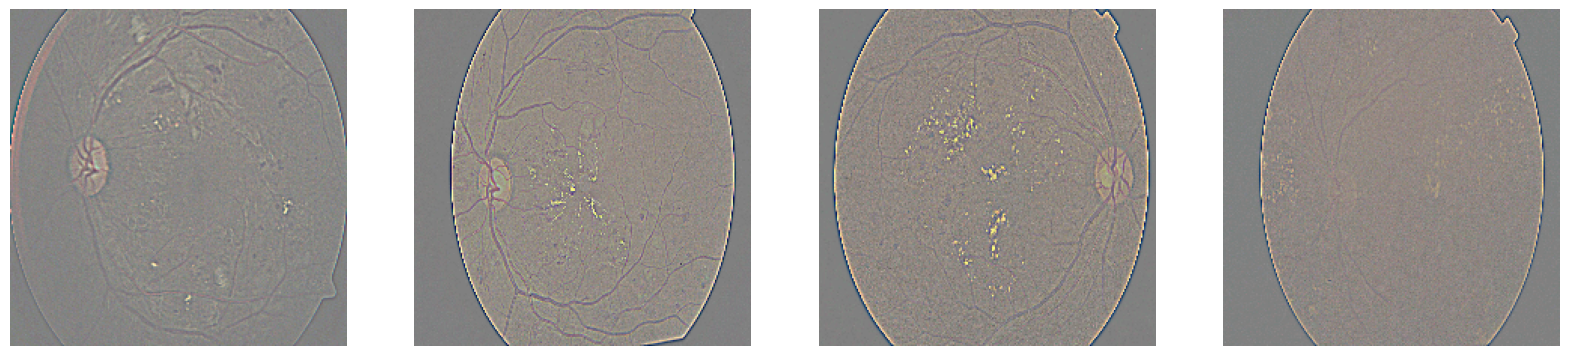

Loaded 24 training images and 6 test images.


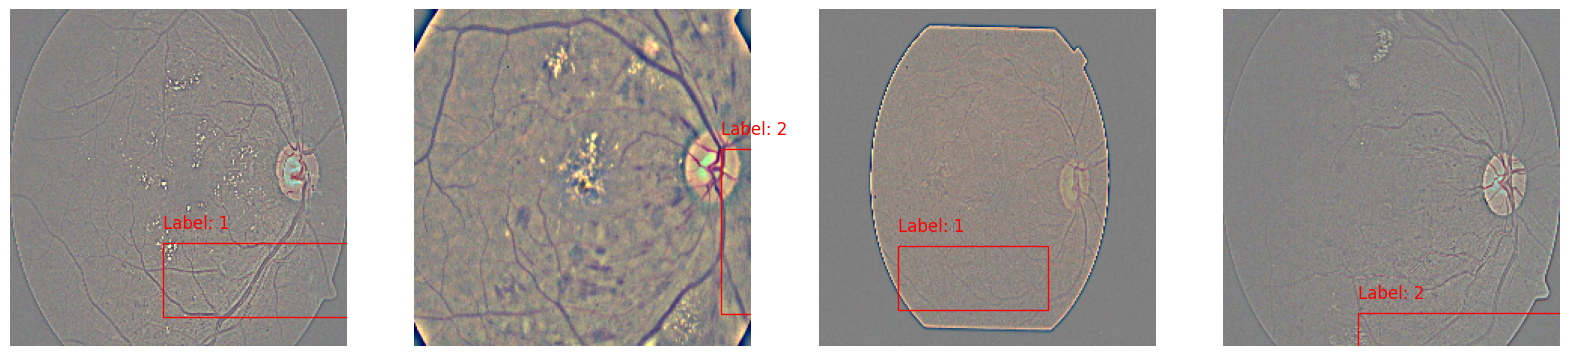

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.patches as patches

# Función para cargar imágenes desde una ruta
def load_data(path):
    images = []
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = Image.open(img_path)
        img = img.resize((224, 224))  # Redimensionar la imagen si es necesario
        img = np.array(img)
        images.append(img)
    return images


# Cargar las imágenes
images = load_data(path)

# Mostrar algunas imágenes sin transformación para verificar la carga correcta
def show_sample_images(images):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    for i, ax in enumerate(axs):
        ax.imshow(images[i])
        ax.axis('off')
    plt.show()

# Mostrar las primeras 4 imágenes
show_sample_images(images[:4])

# Convertir las listas a arrays de numpy
images = np.array(images)

# Normalizar las imágenes
images = images / 255.0

# Asegurar la forma correcta de las etiquetas (aunque no se estén utilizando las anotaciones)
labels = np.zeros((images.shape[0], 4), dtype=np.float32)  # Inicializar con ceros para la forma requerida

# Dividir los datos en conjuntos de entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Loaded {len(train_images)} training images and {len(test_images)} test images.")

# Suponiendo que tienes las cajas delimitadoras y etiquetas de predicción para test_images
# Aquí vamos a generar cajas delimitadoras ficticias para el ejemplo
pred_boxes = np.random.rand(len(test_images), 4) * 224  # Coordenadas (x, y, ancho, alto)
pred_labels = np.random.randint(0, 4, len(test_images))  # Etiquetas ficticias

# Función para mostrar imágenes con sus cajas delimitadoras y etiquetas
def show_images_with_boxes(images, boxes, labels):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    for i, ax in enumerate(axs):
        image = images[i]
        box = boxes[i]
        label = labels[i]

        ax.imshow(image)
        rect = patches.Rectangle((box[0], box[1]), box[2], box[3],
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(box[0], box[1] - 10, f'Label: {label}', color='red', fontsize=12)
        ax.axis('off')
    plt.show()

# Mostrar las primeras 4 imágenes con sus cajas y etiquetas
show_images_with_boxes(test_images[:4], pred_boxes[:4], pred_labels[:4])

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

2024-07-03 02:08:57.181926: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-03 02:08:57.527800: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-03 02:08:58.772856: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-03 02:09:02.210985: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
# Cargar las imágenes
images = load_data(path)

# Convertir las listas a arrays de numpy
images = np.array(images)

# Normalizar las imágenes
images = images / 255.0

# Asegurar la forma correcta de las etiquetas (aunque no se estén utilizando las anotaciones)
labels = np.zeros((images.shape[0], 4), dtype=np.float32)  # Inicializar con ceros para la forma requerida

# Dividir los datos en conjuntos de entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Loaded {len(train_images)} training images and {len(test_images)} test images.")

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),  # Ajusta la tasa de dropout según sea necesario
    Dense(4, activation='softmax')  # Ajusta el número final según tu problema de clasificación
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Loaded 24 training images and 6 test images.


/home/user/tarea-daza/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
print(f"Dimensiones de train_images: {train_images.shape}")
print(f"Dimensiones de train_labels: {train_labels.shape}")

Dimensiones de train_images: (24, 224, 224, 3)
Dimensiones de train_labels: (24, 4)


In [11]:
history = model.fit(train_images, train_labels, epochs=3, batch_size=16, validation_data=(test_images, test_labels))

Epoch 1/3


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.1944 - loss: 0.2467 - val_accuracy: 0.0000e+00 - val_loss: 0.1840
Epoch 2/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.1875 - loss: 0.1790 - val_accuracy: 1.0000 - val_loss: 0.1467
Epoch 3/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4653 - loss: 0.1452 - val_accuracy: 0.0000e+00 - val_loss: 0.1393


In [15]:
# Evaluar el modelo con datos de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy en datos de prueba: {test_acc}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.0000e+00 - loss: 0.1393
Accuracy en datos de prueba: 0.0


### Gráficos de Precisión y Pérdida

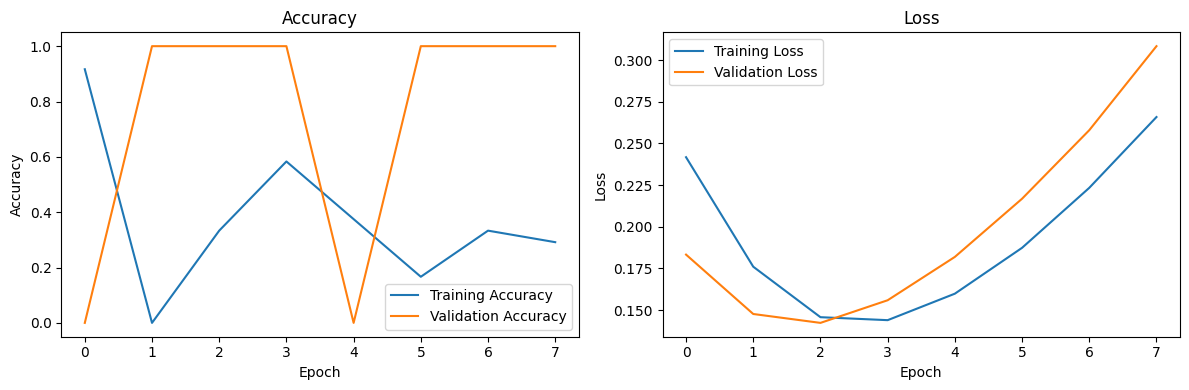

In [139]:
plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Matriz de Confusión

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


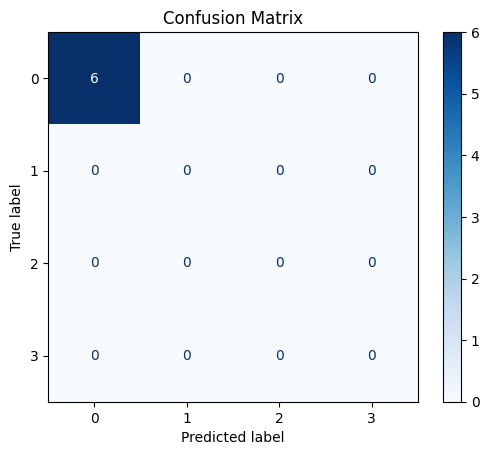

In [146]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Obtener las etiquetas reales del conjunto de prueba
true_labels = np.argmax(test_labels, axis=1)

# Obtener todas las etiquetas posibles (asumiendo que tienes 4 clases)
all_labels = np.arange(4)  # Actualiza este rango según el número de clases en tu problema

# Calcular la matriz de confusión
cm = confusion_matrix(true_labels, y_pred_labels, labels=all_labels)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix')
plt.show()

### Gráficos de Predicciones vs. Etiquetas

In [141]:
# Elegir algunas imágenes aleatorias del conjunto de prueba
random_indices = np.random.choice(len(test_images), size=10, replace=False)
sample_images = test_images[random_indices]
sample_labels = true_labels[random_indices]

# Predecir las etiquetas para las muestras
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Graficar las imágenes junto con las etiquetas predichas y verdaderas
plt.figure(figsize=(15, 8))
for i, (image, pred_label, true_label) in enumerate(zip(sample_images, predicted_labels, sample_labels)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Pred: {pred_label}, True: {true_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


ValueError: Cannot take a larger sample than population when 'replace=False'

### Precisión, Recall y F1-Score

In [142]:
from sklearn.metrics import classification_report

# Generar un reporte de clasificación
print(classification_report(true_labels, y_pred_labels))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



### Visualización de Predicciones Incorrectas

In [143]:
# Mostrar ejemplos de predicciones incorrectas
incorrect_indices = np.where(y_pred_labels != true_labels)[0]
num_examples = 10  # Número de ejemplos a mostrar

plt.figure(figsize=(15, 8))
for i, incorrect_idx in enumerate(incorrect_indices[:num_examples]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[incorrect_idx].squeeze(), cmap='gray')
    plt.title(f'Pred: {y_pred_labels[incorrect_idx]}, True: {true_labels[incorrect_idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


<Figure size 1500x800 with 0 Axes>

### Visualización de Métricas de Entrenamiento

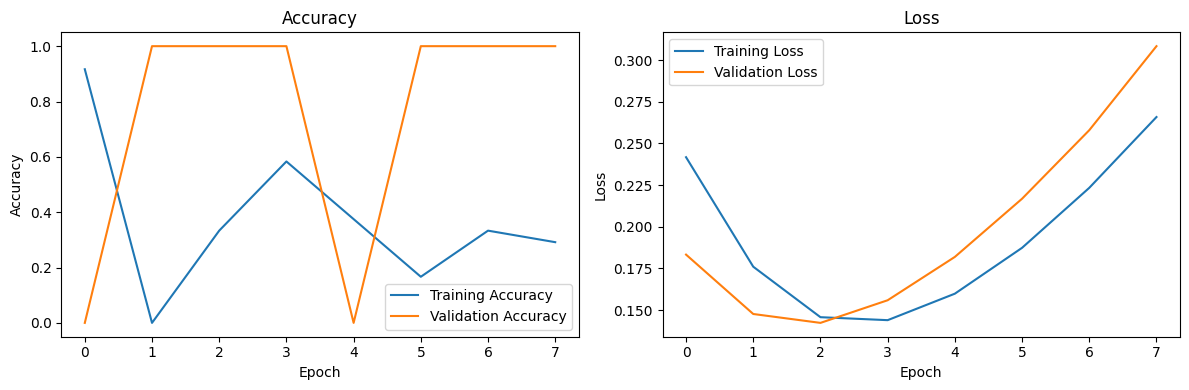

In [144]:
# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
